K-means


In [ ]:
from google.colab import files
from IPython.display import Image


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
 uploaded =files.upload()

Saving 1_2Ry_57l1BAKQh0Wgp2kIUg.jpg to 1_2Ry_57l1BAKQh0Wgp2kIUg.jpg


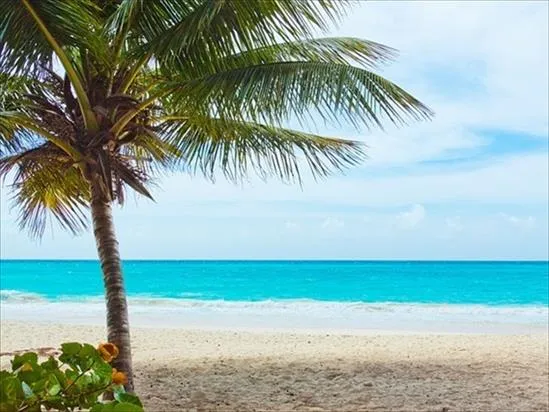

In [ ]:
Image("1_2Ry_57l1BAKQh0Wgp2kIUg.jpg")

In [ ]:
original_image = cv2.imread('1_2Ry_57l1BAKQh0Wgp2kIUg.jpg')

# Check if the image was loaded successfully
if original_image is not None:
    # Convert color space
    img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    # Reshape the image
    vectorized = img.reshape((-1,3))    #converts the MxNx3 image into a Kx3 matrix where K=MxN and each row is now a vector in the 3-D space of RGB.
    vectorized = np.float32(vectorized) #We convert the unit8 values to float as it is a requirement of the k-means

    # Further processing or display the image
else:
    print("Failed to load the image.")

Define criteria, number of clusters(K) and apply k-means()

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [ ]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
# k = 3   3 colors, green-colored grass and forest, blue sea and the greenish-blue seashore.


Now convert back into uint8.

In [ ]:
center = np.uint8(center)

Next, we have to access the labels to regenerate the clustered image

In [ ]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

visualize the output result with K=3

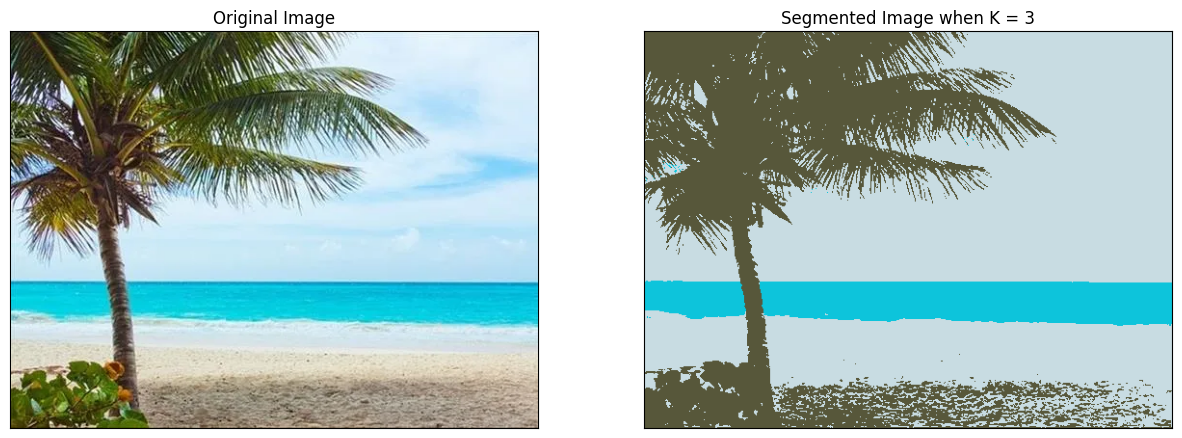

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

AgglomerativeClustering


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline        # Magic command for displaying plots inline in Jupyter Notebook or Colab
import numpy as np

In [ ]:
 uploaded =files.upload()


Saving hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv to hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv


In [ ]:
customer_data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [ ]:
customer_data.shape   # Display the shape (dimensions) of the DataFrame

(200, 5)

In [ ]:
customer_data.head()    # Display the first few rows of the DataFrame


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 Extract the relevant features (columns 3 and 4) from the DataFrame and convert them to a NumPy array


In [ ]:
data = customer_data.iloc[:, 3:5].values

In [ ]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

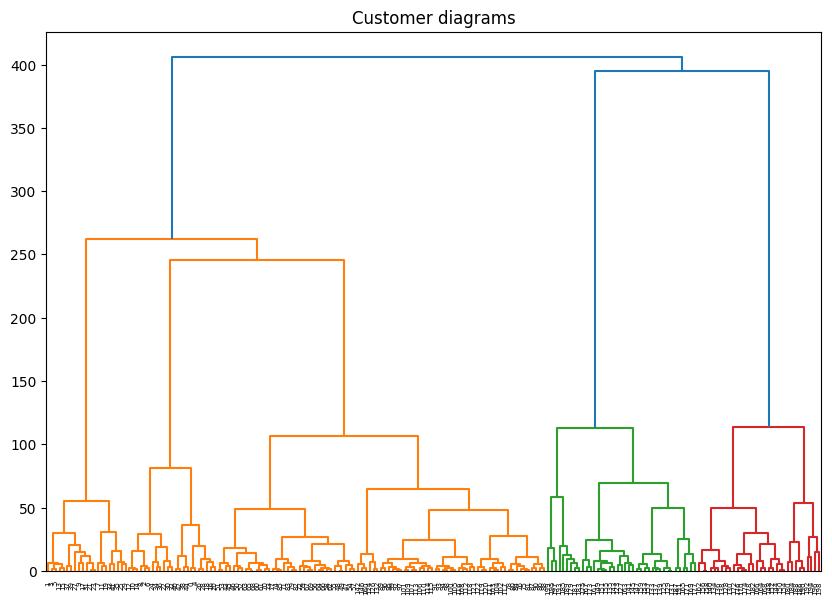

In [ ]:
import scipy.cluster.hierarchy as shc
# Plot the dendrogram for hierarchical clustering using Ward's method
plt.figure(figsize=(10, 7))
plt.title("Customer dendrogram")
dend = shc.dendrogram(shc.linkage(data, method='ward'))   #dendrogram plot using hierarchical clustering

min (single-link)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering using AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
labels_   # Display the cluster labels assigned to each data point

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Plot the clustered data points

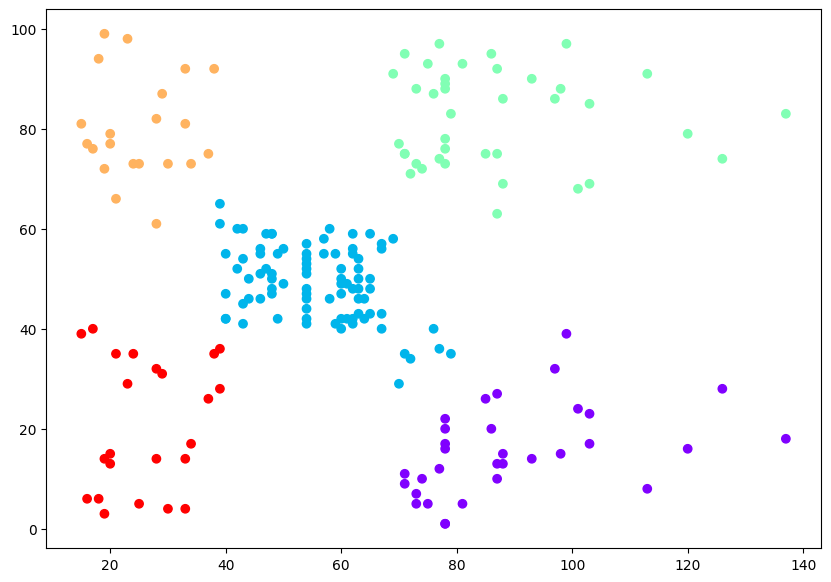

In [ ]:
plt.figure(figsize=(10, 7))   #new figure
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

mean shift


In [1]:
import numpy as np

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs


In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

In [3]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


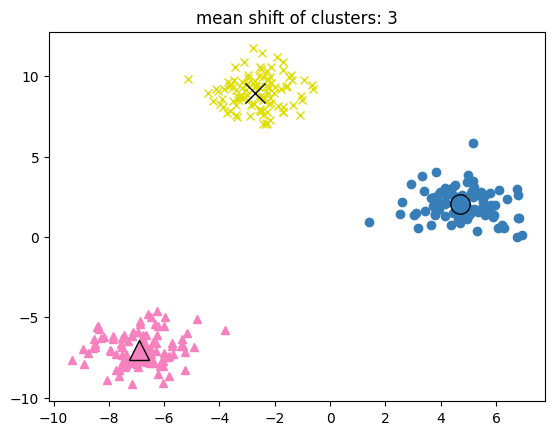

In [4]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("mean shift of clusters: %d" % n_clusters_)
plt.show()

##pixel location of the top of the hill

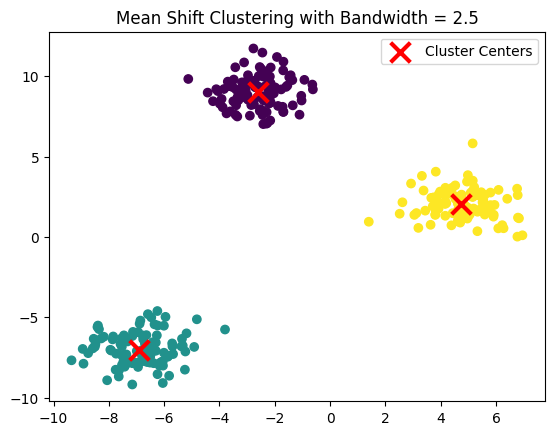

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply Mean Shift clustering with a specific bandwidth
bandwidth = 2.5
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift.fit(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=mean_shift.labels_, cmap='viridis', marker='o')
plt.scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1],
			c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')
plt.title('Mean Shift Clustering with Bandwidth = {}'.format(bandwidth))
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


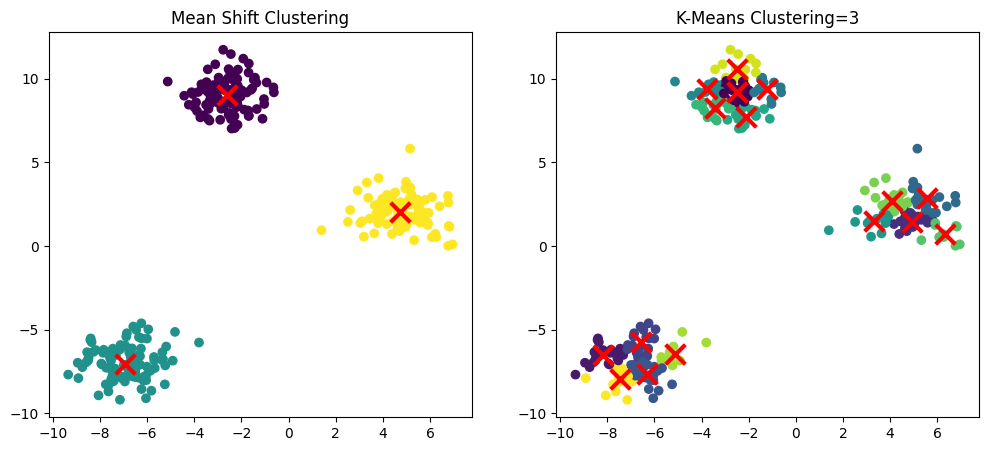

In [ ]:
from sklearn.cluster import MeanShift, KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply Mean Shift clustering
mean_shift = MeanShift()
mean_shift.fit(X)

# Apply K-Means clustering for comparison
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(X)

# Visualize the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=mean_shift.labels_, cmap='viridis', marker='o')
plt.scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1],
			c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')
plt.title('Mean Shift Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
			c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')
plt.title('K-Means Clustering=3')

plt.show()
